## Física Computacional
- Universidad Nacional de Trujillo
- Herrera Monteza Jherson Miguel

Considere un péndulo simple con una longitud de $l$ m  y una masa de $m$ kg. La ecuación de movimiento para la masa es:

$$ \theta^{\prime \prime} = -\dfrac{g}{l}\sin(\theta)$$

donde $\theta$ positivo se mide en sentido antihorario. Para pequeños ángulos $\theta$, $\sin(\theta) = \theta$ y la ecuación de movimiento linealizada es:

$$ \theta^{\prime \prime} = -\dfrac{g}{l}\theta $$
![](Imagen1.png)


La aceleración de la gravedad es: $g = 9.81 m/s^2$ y $l = 0.6m$. Asumir que el péndulo inicia su movimiento del reposo con $\theta _{(t=0)}=10^{°}$

- a)      Solucionar la ecuación linealizada para $0 \leq t \leq 6$ usando Runge-Kutta de orden 4.
Intentar con pasos de tiempo $h = 0.15, 0.5, 1$. Discutir los resultados en términos de lo que se sabe sobre la precisión comparándola con la solución exacta.


primero importamos librerías:


In [366]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style            # Libreria para estilos de graficos
plt.style.use(['science', 'notebook']) 

Si hacemos:
$$ \theta^{\prime} = z $$
entonces:
$$ z^{\prime} = -\dfrac{g}{l} \theta$$

Luego definimos la función para el sistema:

In [367]:
# Función que devuelve un punto del sistema
def linealizada(angulo, longitud, gravedad, z):
    dthetadt = z
    dzdt = -gravedad*angulo/longitud
    return dthetadt, dzdt
# La función devuelve dos valores, el primero corresponde a theta prima y el segundo a zeta prima

In [368]:
def runge_kutta_pendulo(h, funcion, longitud, gravedad, thetao, zo, z = None, theta = None):
    # Se hace esto para que al llamar la función se cree una nueva lista, y además sea reutiizable por otras porciones de código
    if theta is None:
        theta = [thetao]     # thetao es la posición inicial del péndulo
    if z is None:
        z = [zo]             # zo es la velocidad inicial de la masa
    tiempo = np.arange(0, 6, h)                                 # Se crea una lista de tiempos con tmenor igual a 6 como indica el problema
    for i in range(len(tiempo)-1):
        k1, l1 = funcion(theta[i], longitud, gravedad, z[i])    # Se llama a la fución del sistema 
        k1 = h*k1       # se multiplica por h
        l1 = h*l1       # se multiplica por h
        k2,l2 = funcion(theta[i] + k1/2, longitud, gravedad, z[i] + l1/2)
        k2 = h*k2
        l2 = h*l2        
        k3,l3 = funcion(theta[i] + k2/2, longitud, gravedad, z[i] + l2/2)
        k3 = h*k3
        l3 = h*l3        
        k4,l4 = funcion(theta[i] + k3, longitud, gravedad, z[i] + l3)
        k4 = h*k4
        l4 = h*l4
        theta.append(theta[i] + (k1+2*k2+2*k3+k4)/6)    # se agrega cada valor de theta a la lista
        z.append(z[i] + (l1+2*l2+2*l3+l4)/6)            # se agrega cada valor de z a la lista
    return theta, z, tiempo                             # se devuelven las listas de theta y z
    

Llamamos a ambas funciones y graficamos el ángulo vs el tiempo, notamos que para valores pequeños de paso de tiempo la funcíon es más suave. 

Text(0, 0.5, '$ \\theta \\ [rad]$')

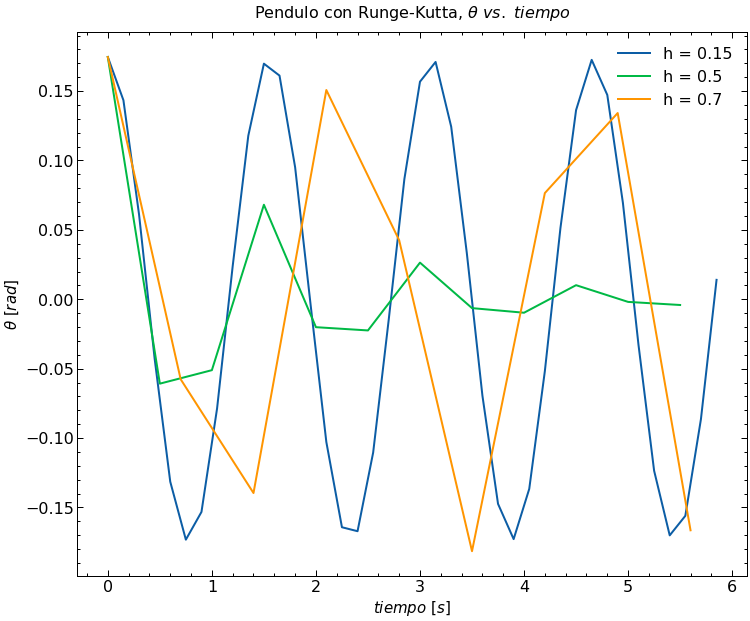

In [369]:
ax1 = plt.figure(figsize=(12,10))
for m in [0.15, 0.5, 0.7]:
    yy,dydt, tiempo = runge_kutta_pendulo(h=m, funcion = linealizada, longitud = 0.6, gravedad = 9.82, thetao = np.pi*10/180, zo = 0)
    plt.plot(tiempo, yy, label = 'h = ' + str(m))
    plt.legend()
plt.title(r'Pendulo con Runge-Kutta, $\theta \ vs. \ tiempo$', pad = 15)
plt.xlabel(r'$ tiempo \ [s]$', fontsize = 15)
plt.ylabel(r'$ \theta \ [rad]$', fontsize = 15)

Graficamos la velocidad versus el ángulo y se observa que es un sistema conservativo para valores pequeños de h.

Text(0, 0.5, '$ \\theta^{\\prime} \\ [rad/s]$')

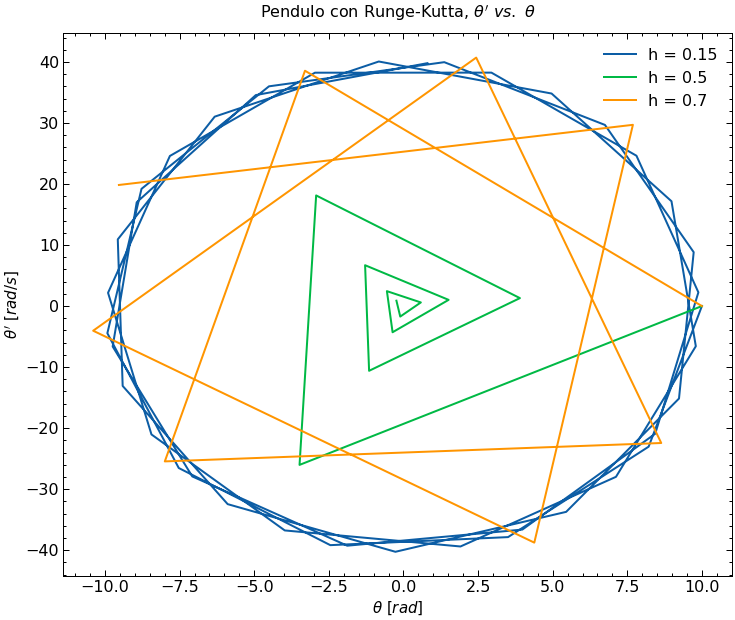

In [370]:
ax2 = plt.figure(figsize=(12,10))
for m in [0.15, 0.5, 0.7]:
    yy,dydt, tiempo = runge_kutta_pendulo(h=m, funcion = linealizada, longitud = 0.6, gravedad = 9.82, thetao = 10, zo = 0)
    plt.plot(yy, dydt, label = 'h = ' + str(m))
    plt.legend()
plt.title(r'Pendulo con Runge-Kutta, $\theta^{\prime}\ vs. \ \theta$', pad = 15)
plt.xlabel(r'$ \theta \ [rad]$', fontsize = 15)
plt.ylabel(r'$ \theta^{\prime} \ [rad/s]$', fontsize = 15)

La solución exacta es:
$$ \theta_{(t)} = c_1 \sin \left ( \sqrt{\dfrac{g}{l}}t \right ) + c_2 \cos \left ( \sqrt{\dfrac{g}{l}}t \right )$$

Con las condiciones iniciales $\theta _{(t=0)}=10^{°} \rightarrow \theta _{(t=0)}= \frac{\pi*10 }{180} $, también $\theta^{\prime}_{(t=0)} = 0$.
$$ \theta_{(t)} = \dfrac{\pi}{18} \cos \left ( \sqrt{\dfrac{g}{l}}t \right )$$

Definimos la función para la solución exacta:

In [371]:
def solucion_exacta_lineal(g,l,t):
    return (np.pi/18)*np.cos(np.sqrt(g/l)*t)

Calculamos la solución exacta:

In [372]:
tiempo_exacto = np.arange(0, 6, 0.01)
theta_exacto = solucion_exacta_lineal(9.82, 0.6, tiempo_exacto)

Graficamos la solución exacta y la solución obtenida por el método de Runge_Kutta de orden 4 para un valor de $h = 0.1$

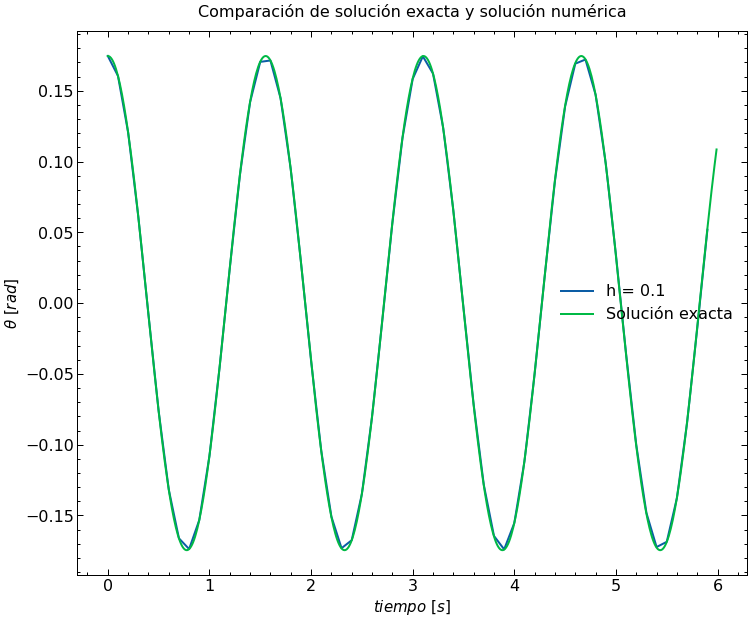

In [373]:
ax3 = plt.figure(figsize=(12,10))
yy1,dydt1, tiempo1 = runge_kutta_pendulo(h=0.1, funcion = linealizada, longitud = 0.6, gravedad = 9.82, thetao = np.pi/18, zo = 0)
plt.plot(tiempo1, yy1, label = 'h = 0.1')
plt.plot(tiempo_exacto, theta_exacto, label = 'Solución exacta')
plt.title(r'Comparación de solución exacta y solución numérica', pad = 15)
plt.xlabel(r'$ tiempo \ [s]$', fontsize = 15)
plt.ylabel(r'$ \theta \ [rad]$', fontsize = 15)
plt.legend()

- b) Suponer que la masa $m$ es puesta en un fluido viscoso. La ecuación linealizada de movimiento ahora es:
$$\theta^{\prime \prime} +c\theta^{\prime}+\dfrac{g}{l}\theta=0$$

Para $c=4s^{-1}$. Repetir la parte a) Solucionar la ecuación linealizada para $0 \leq t \leq 6$ usando Runge-Kutta de orden 4.
Intentar con pasos de tiempo $h = 0.15, 0.5, 1$. Discutir los resultados en términos de lo que se sabe sobre la precisión comparándola con la solución exacta.

Expresamos la ecuación como:
$$ \theta^{\prime \prime} = -c\theta^{\prime}-\dfrac{g}{l}\theta $$

Con un cambio de variable se obtiene el sistema: 
$$\theta^{\prime} = z$$
$$ z^{ \prime} = -cz-\dfrac{g}{l}\theta $$

definimos la función del sistema:

In [374]:
def pendulo_viscoso_sistema(angulo, longitud, gravedad, z, c=4):
    dtheta = z
    dzeta = -c*z - gravedad*angulo/longitud
    return dtheta, dzeta

Llamamos a la función runge_kutta_pendulo con las condiciones previas:

Text(0, 0.5, '$ \\theta \\ [rad]$')

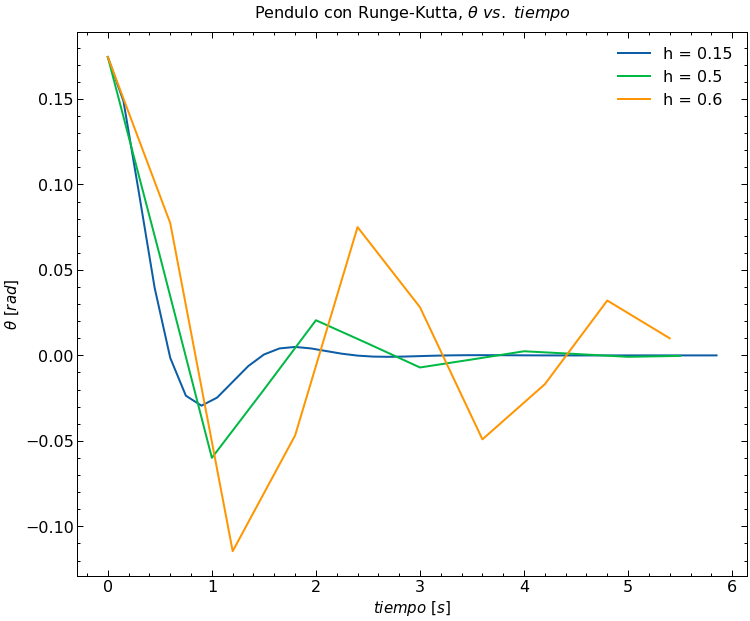

In [375]:
ax4 = plt.figure(figsize=(12,10))
for m in [0.15, 0.5, 0.6]:
    yy,dydt, tiempo = runge_kutta_pendulo(h=m, funcion = pendulo_viscoso_sistema, longitud = 0.6, gravedad = 9.82, thetao = np.pi*10/180, zo = 0)
    plt.plot(tiempo, yy, label = 'h = ' + str(m))
    plt.legend()
plt.title(r'Pendulo con Runge-Kutta, $\theta \ vs. \ tiempo$', pad = 15)
plt.xlabel(r'$ tiempo \ [s]$', fontsize = 15)
plt.ylabel(r'$ \theta \ [rad]$', fontsize = 15)

Text(0, 0.5, '$ \\theta^{\\prime} \\ [rad/s]$')

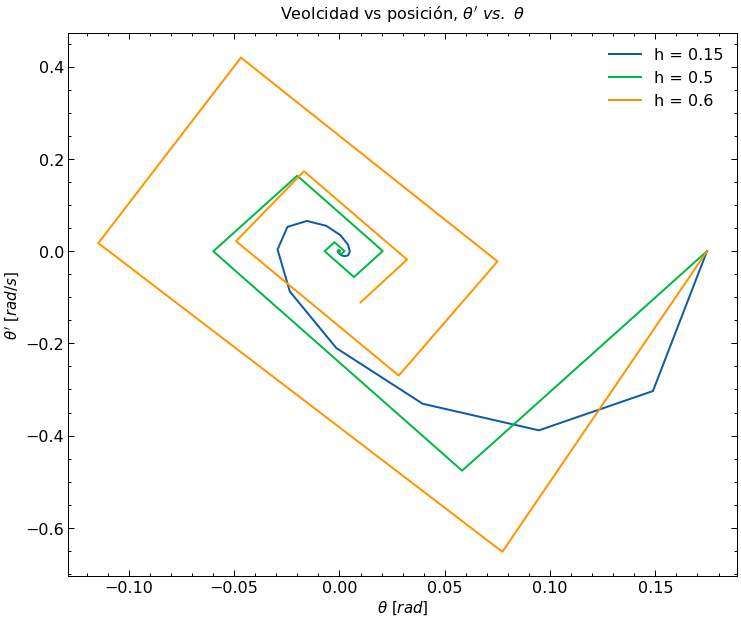

In [376]:
ax5 = plt.figure(figsize=(12,10))
for m in [0.15, 0.5, 0.6]:
    yy,dydt, tiempo = runge_kutta_pendulo(h=m, funcion = pendulo_viscoso_sistema, longitud = 0.6, gravedad = 9.82, thetao = np.pi*10/180, zo = 0)
    plt.plot(yy, dydt, label = 'h = ' + str(m))
    plt.legend()
plt.title(r'Veolcidad vs posición, $\theta^{\prime}\ vs. \ \theta$', pad = 15)
plt.xlabel(r'$ \theta \ [rad]$', fontsize = 15)
plt.ylabel(r'$ \theta^{\prime} \ [rad/s]$', fontsize = 15)

podemos disminuir el valor de h para ver algo más contínuo en el gráfico.

Text(0, 0.5, '$ \\theta^{\\prime} \\ [rad/s]$')

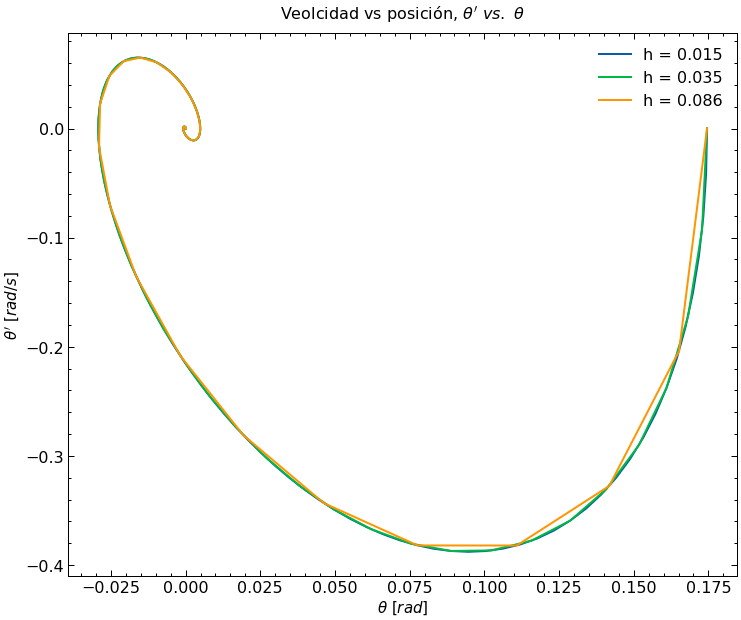

In [377]:
ax6 = plt.figure(figsize=(12,10))
for m in [0.015, 0.035, 0.086]:
    yy,dydt, tiempo = runge_kutta_pendulo(h=m, funcion = pendulo_viscoso_sistema, longitud = 0.6, gravedad = 9.82, thetao = np.pi*10/180, zo = 0)
    plt.plot(yy, dydt, label = 'h = ' + str(m))
    plt.legend()
plt.title(r'Veolcidad vs posición, $\theta^{\prime}\ vs. \ \theta$', pad = 15)
plt.xlabel(r'$ \theta \ [rad]$', fontsize = 15)
plt.ylabel(r'$ \theta^{\prime} \ [rad/s]$', fontsize = 15)

La solución exacta para los valores de g y l dados es: 

$$ \theta = c_1 e^{-2t} \sin(3.5171t) + c_2 e^{-2t}\cos(3.5171t) $$

con las condiciones iniciales se obtiene:
$$ \theta = \dfrac{\pi}{18}e^{-2t}\cos(3.5171t) + \dfrac{\pi}{27}e^{-2t}\sin(3.5171t)$$

In [378]:
t = np.arange(0, 6, 0.01)
sol_viscoso_e = np.exp(-2*t)*(np.pi/18)*np.cos(3.5171*t)+(np.pi/27)*np.exp(-2*t)*np.sin(3.5171*t)


Comparamos las gráficas de la solución exacta y la solución obtenida por el método de Runge-Kutta de orden 4 para un paso de tiempo $h = 0.15$.

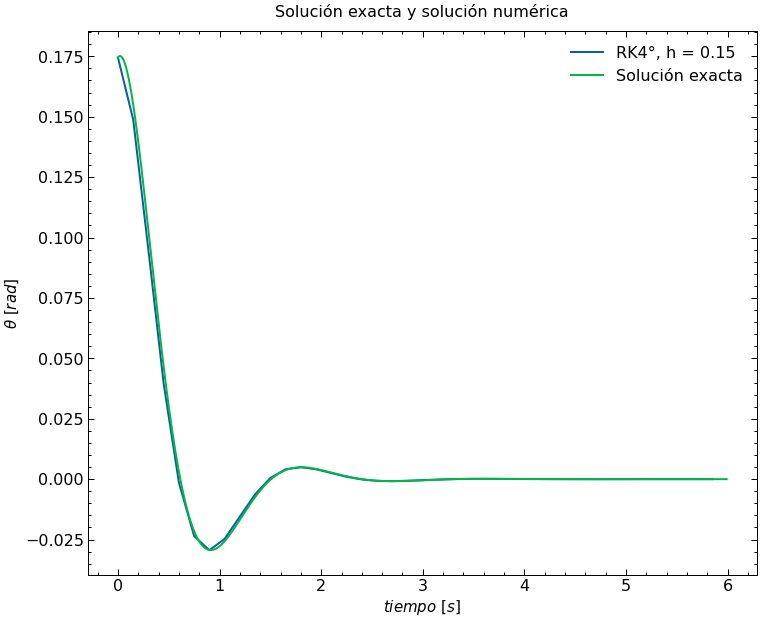

In [379]:
ax6 = plt.figure(figsize=(12,10))
ytheta,dydtheta, tpo = runge_kutta_pendulo(h=0.15, funcion = pendulo_viscoso_sistema, longitud = 0.6, gravedad = 9.82, thetao = np.pi/18, zo = 0)
plt.plot(tpo, ytheta, label = 'RK4°, h = 0.15')
plt.plot(t, sol_viscoso_e, label = 'Solución exacta')
plt.title(r'Solución exacta y solución numérica', pad = 15)
plt.xlabel(r'$ tiempo \ [s]$', fontsize = 15)
plt.ylabel(r'$ \theta \ [rad]$', fontsize = 15)
plt.legend()

Notamos una aproximación satisfactoria con un valor de paso relativamente grande en comparación a otros métodos de aproximación, lo que demuestra que el método de Runkle-Kutta de orden 4 presenta menos error.

- c) Resolverla ecuación no lineal sin amortiguamiemto usando Runge-Kutta de orden 4 para $\theta_{(t=0)}=60^{°}$ y comparar con la solución lineal exacta. Cómo se compara el máximo paso de tiempo tomado para el problema no lineal con la predicción lineal

LLamamos a la función con la nueva posición inicial y comparamos:

Text(0, 0.5, '$ \\theta \\ [rad]$')

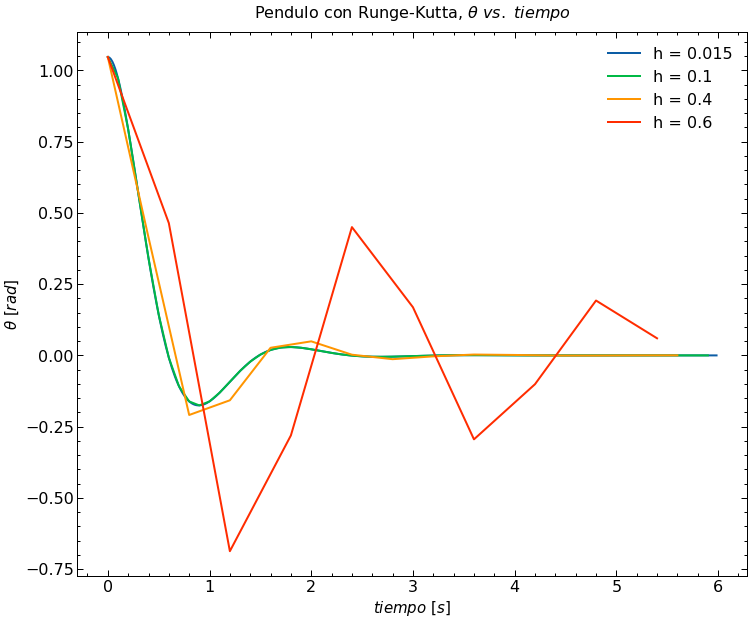

In [380]:
ax7 = plt.figure(figsize=(12,10))
for m in [0.015, 0.1, 0.4, 0.6]:
    y4,dydt4, tiempo4 = runge_kutta_pendulo(h=m, funcion = pendulo_viscoso_sistema, longitud = 0.6, gravedad = 9.82, thetao = np.pi/3, zo = 0)
    plt.plot(tiempo4, y4, label = 'h = ' + str(m))
    plt.legend()
plt.title(r'Pendulo con Runge-Kutta, $\theta \ vs. \ tiempo$', pad = 15)
plt.xlabel(r'$ tiempo \ [s]$', fontsize = 15)
plt.ylabel(r'$ \theta \ [rad]$', fontsize = 15)

La última gráfica evidencia que el tamaño del paso de tiempo es muy importante al realizar aproximaciones de Runge-Kutta de orden 4. y que para valores mayores de $h=0.6$ el error es más grande.